# Support Vector Machines
[History of Support Vector Machines from Patrick Winston](https://youtu.be/_PwhiWxHK8o?t=2777)

$$ \text{Do not find a hyperplane, but find a hyperplane that maximizes the margin} $$





### Setup

$$ \mathcal D = \{(x_i,y_i)\}_{i=1} ^n$$


### What is a hyperplane 
A hyperplane is a set of data points $\mathcal H_{w,b} ) {x: w^T x + b =0}$.

### What is the margin given a hyperplane
To find a margin, we firstly need to be able to compute the distance of a point to the hyperplane

1. $\vec w \vec x + b = 0$
2. Let $\vec x_p$ be a point whose distance to $H_{w,b}$ we want to compute: $\vec x_p = \vec x - \vec d$, where $\vec x \in H_{w,b}$
3. $\vec w (\vec x - \vec d) +b = 0$
4. $\vec d= \alpha \vec w$ because d should be paralel to w.


#### Finding $\alpha$
$$ \vec w (\vec x - \alpha \vec w) +b = 0 \implies \alpha = \frac{w^T x + b}{w^T w}$$

#### Finding distance $\vec d$
$$ \vec d = \frac{w^T x + b}{w^T w} * \vec w$$


#### Finding margin $\gamma(w,b,\mathcal D)$

$$ \gamma(w,b,\mathcal D) = min \frac{|w^t x +b|}{w^T w}$$

# SVM objective


### 1. $$ max_{w,b} =  \gamma(w,b,\mathcal D) \; \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0$$



### 2. $$ max_{w,b} =  \frac{1}{||w||_2} \Big[ min_x |w^t x +b| \Big] \; \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0$$

$w$ is not a function of x. Hence, we can take it out.



### 3. $$ min_{w,b} =  ||w||_2 \Big[ min_x |w^t x +b| \Big] \; \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0$$

Instead of maximizing with respect to 1/w, minimize w

### 4. $$ min_{w,b} =  ||w|| \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0 \\ \text{and} \\ \forall i \; min_i |w^T x_i +b|=1$$


__Scale Invariance comes to rescue__ $\gamma(w,b,\mathcal D)=\gamma(\beta w,\beta,\mathcal D) \forall \beta>0$


# 5. $$ argmin_{w,b} ||w|| s.t. \forall (x_i,y_i) \; y_i(w^Tx_i+b)\ge 1 $$
SVM loss function, i.e,. quadratic optimization problem.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

## SVM Loss

$$argmin_{w,b} \; w^T w $$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1$$



## SVM Loss with Slack Variable

$C$ is a hyperparameter
$$argmin_{w,b} \; w^T w \sum_i ^n + \; C \sum_i ^n \xi_i$$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1 - \xi_i\\
\forall i \; \xi_i \ge 0
$$




$$ if  1 - y_i(w^T x_i), \implies \xi= y_i (w^T x_i) $$

$$ if  y_i(w^T x_i)\ge 1 \implies \xi= 0$$

# SVM loss as Hinge loss with l2 norm


$$ \mathcal L (w) = w^T w + C \sum_i max(1-y_i(w^T x_i + b),0)$$

In [2]:
X, y = make_blobs(25, 2, centers=2, random_state=2, cluster_std=1.4)

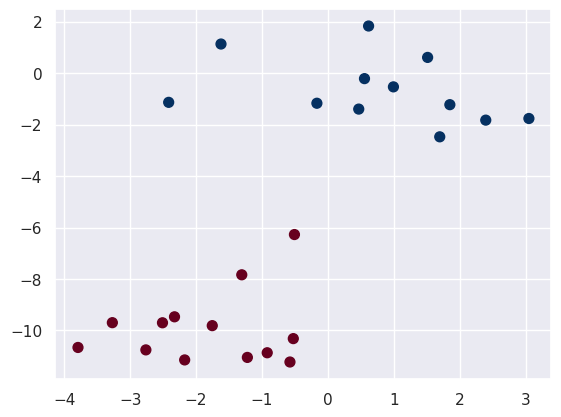

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu');

In [4]:
class SVM:
    def __init__(self,margin=1,C=1,lr=.0001,iteration=10**4):
        self.margin=margin
        self.C=C
        self.lr=lr
        self.w=None
        self.iteration=iteration
        
    def compute_hinge_loss(self):
        """ Compute Cost of slack variables """
        z=self.y*(self.X@self.w)
        hinge_loss=np.maximum(self.margin-z,0)
        idx=np.where(hinge_loss > 0)
        dh_loss=-self.y[idx].T@self.X[idx]
        return hinge_loss,dh_loss
    
    def svm_loss(self):
        # (1) Compute the hingle loss
        hinge_loss, dhinge_loss=self.compute_hinge_loss()
        # (2) Compute SVM loss: Hinge Loss + l2
        svm_loss=np.sum(self.w**2)+ self.C*hinge_loss.sum()        
        # (3) Compute the average the gradient of hinge loss
        dhinge_loss/=self.n
        dhinge_loss*=self.C
        # (4) Compute gradient of regularization
        dl2=2*self.w
        # (5) Compute derivative of the loss w.r.t. w.
        dw=dhinge_loss+dl2
        return svm_loss, dw
    
    def fit(self,X,y):
        # (1) Add ones to input.
        self.X=np.hstack((X,np.ones((len(X),1))))
        # (2) Add bias into weights.
        self.w=np.random.randn(self.X.shape[1])
        self.y=y
        # (3) number of data points.
        self.n=len(self.X)
        # Convert 0 to -1.
        y[y==0]=-1
        
        for i in range(self.iteration):
            #(4) Compute SVM loss and Compute derivative of loss w.r.t. w.
            svm_loss,dw=self.svm_loss()
            # (5) Update w in the negative direction of derivative.
            self.w-=self.lr*dw    
            # Gradient Cliping
            #self.w=np.clip(self.w, -5**2, 5**2)

            if i %(self.iteration//20)==0:
                print(f'Loss:{svm_loss:.5} ||W||={np.sqrt(self.w**2)[0]:.3f}, Acc:{(y==self.predict(X)).mean()}')
                
                if svm_loss==0:
                    print('ZERO loss')
                    break
        return self
    
    def decision_function(self,X):
        X=np.hstack((X,np.ones((len(X),1))))
        return X@self.w
    
    def predict(self,X):
        pred=(self.decision_function(X)>0)*1
        pred[pred==0]=-1
        return pred
    
    
    def plot_decision_boundary(self,X,y,plot_support_vector=False):
        fig, ax = plt.subplots()
        ax.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='RdBu')
        ax.set_title(f'SVM with C:{self.C}', size=14)
        
        xx_min,xy_min=X.min(axis=0)
        xx_max,xy_max=X.max(axis=0)

        # Visualization works perfectly
        xlim,ylim = (xx_min-1, xx_max+1), (xy_min-1, xy_max+1)
        xg = np.linspace(xlim[0], xlim[1], 60)
        yg = np.linspace(ylim[0], ylim[1], 40)
        xx, yy = np.meshgrid(xg, yg)
        Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
        for label, color in enumerate(['red', 'blue']):
            Pm=self.decision_function(Xgrid)
            c=ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
            ax.contour(xx, yy, Pm.reshape(xx.shape),levels=[-self.margin,0,self.margin],
                       colors=color,linestyles=['--', '-', '--'],alpha=0.2)
        fig.colorbar(c, ax=ax)
        ax.set(xlim=xlim, ylim=ylim)

        if plot_support_vector:
        
            P=self.decision_function(X)
            self.support_vectors_=X[(np.where((P <1.1) & (P >-1.1)))]
        
            plt.scatter(self.support_vectors_[:, 0],self.support_vectors_[:, 1],s=300, linewidth=2, facecolors='g',label='Support Vectors');

            pred=self.decision_function(X)
            for i in range(len(X)):
                if -1.1<pred[i]<1.1:
                    plt.annotate(f'  {pred[i]:.3},{y[i]}',xy=(X[i]))
            plt.legend()
        plt.show()

# $C=.01$

Loss:5.3555 ||W||=0.204, Acc:0.04
Loss:4.4897 ||W||=0.186, Acc:0.04
Loss:3.7746 ||W||=0.169, Acc:0.04
Loss:3.1835 ||W||=0.153, Acc:0.04
Loss:2.6945 ||W||=0.139, Acc:0.04
Loss:2.2896 ||W||=0.127, Acc:0.04
Loss:1.9539 ||W||=0.115, Acc:0.04
Loss:1.6752 ||W||=0.105, Acc:0.04
Loss:1.4437 ||W||=0.095, Acc:0.04
Loss:1.2511 ||W||=0.087, Acc:0.04
Loss:1.0906 ||W||=0.079, Acc:0.04
Loss:0.95666 ||W||=0.072, Acc:0.04
Loss:0.84473 ||W||=0.066, Acc:0.04
Loss:0.75102 ||W||=0.060, Acc:0.0
Loss:0.67243 ||W||=0.055, Acc:0.0
Loss:0.60639 ||W||=0.051, Acc:0.0
Loss:0.5508 ||W||=0.046, Acc:0.0
Loss:0.50389 ||W||=0.043, Acc:0.0
Loss:0.46424 ||W||=0.039, Acc:0.0
Loss:0.43064 ||W||=0.036, Acc:0.0


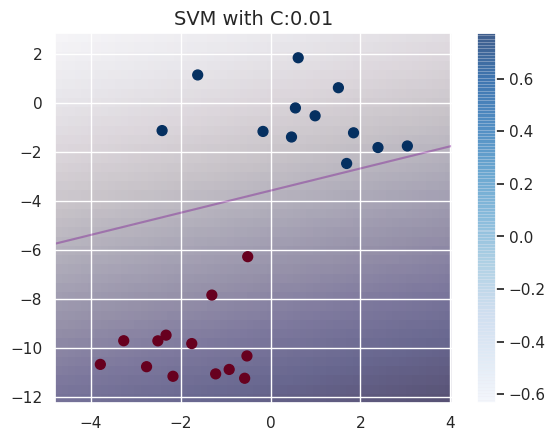

In [5]:
svm=SVM(C=.01).fit(X,y)
svm.plot_decision_boundary(X,y)

# $C=.05$

Loss:3.132 ||W||=0.169, Acc:0.64
Loss:2.7172 ||W||=0.152, Acc:0.64
Loss:2.3714 ||W||=0.137, Acc:0.64
Loss:2.0826 ||W||=0.123, Acc:0.64
Loss:1.8412 ||W||=0.110, Acc:0.64
Loss:1.6389 ||W||=0.099, Acc:0.64
Loss:1.4691 ||W||=0.088, Acc:0.64
Loss:1.3292 ||W||=0.079, Acc:0.64
Loss:1.2137 ||W||=0.071, Acc:0.64
Loss:1.1165 ||W||=0.063, Acc:0.64
Loss:1.0389 ||W||=0.056, Acc:0.64
Loss:0.974 ||W||=0.050, Acc:0.64
Loss:0.9192 ||W||=0.045, Acc:0.64
Loss:0.87286 ||W||=0.040, Acc:0.64
Loss:0.83357 ||W||=0.035, Acc:0.64
Loss:0.80019 ||W||=0.031, Acc:0.64
Loss:0.77176 ||W||=0.027, Acc:0.64
Loss:0.7475 ||W||=0.024, Acc:0.64
Loss:0.72673 ||W||=0.020, Acc:0.64
Loss:0.70891 ||W||=0.018, Acc:0.64


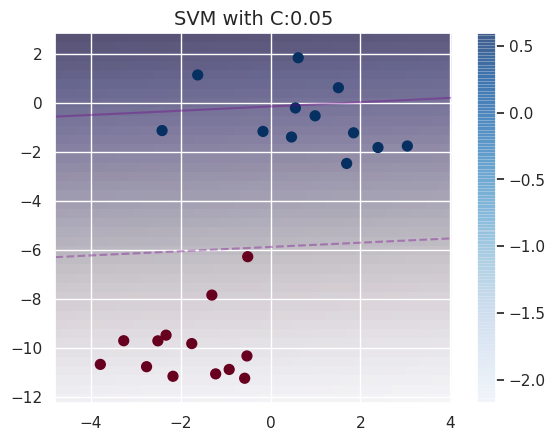

In [6]:
svm=SVM(C=.05).fit(X,y)
svm.plot_decision_boundary(X,y)

# $C=.1$

Loss:18.317 ||W||=2.058, Acc:0.16
Loss:16.028 ||W||=1.855, Acc:0.16
Loss:14.039 ||W||=1.672, Acc:0.16
Loss:12.319 ||W||=1.506, Acc:0.12
Loss:10.821 ||W||=1.355, Acc:0.12
Loss:9.5102 ||W||=1.219, Acc:0.12
Loss:8.3611 ||W||=1.096, Acc:0.12
Loss:7.3516 ||W||=0.985, Acc:0.12
Loss:6.4628 ||W||=0.884, Acc:0.12
Loss:5.6788 ||W||=0.793, Acc:0.12
Loss:4.9859 ||W||=0.711, Acc:0.12
Loss:4.3726 ||W||=0.636, Acc:0.2
Loss:3.8286 ||W||=0.569, Acc:0.32
Loss:3.3456 ||W||=0.508, Acc:0.36
Loss:2.9159 ||W||=0.452, Acc:0.48
Loss:2.5442 ||W||=0.403, Acc:0.6
Loss:2.2785 ||W||=0.358, Acc:0.6
Loss:2.0841 ||W||=0.318, Acc:0.68
Loss:1.9444 ||W||=0.282, Acc:0.64
Loss:1.8211 ||W||=0.250, Acc:0.64


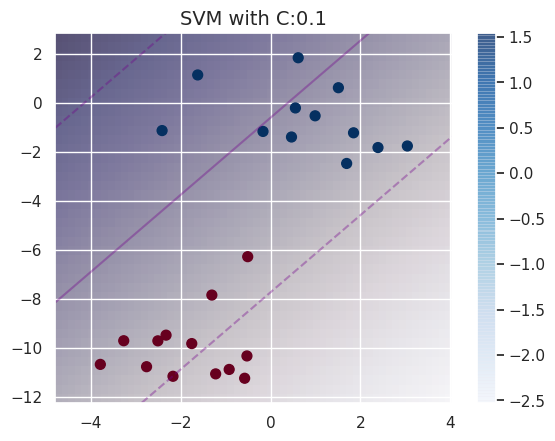

In [7]:
svm=SVM(C=.1).fit(X,y)
svm.plot_decision_boundary(X,y)

# $C=.5$

Loss:57.881 ||W||=0.517, Acc:0.2
Loss:45.101 ||W||=0.492, Acc:0.16
Loss:33.823 ||W||=0.471, Acc:0.16
Loss:24.05 ||W||=0.455, Acc:0.16
Loss:15.394 ||W||=0.442, Acc:0.52
Loss:10.7 ||W||=0.422, Acc:0.68
Loss:9.4218 ||W||=0.394, Acc:0.64
Loss:8.848 ||W||=0.367, Acc:0.64
Loss:8.4577 ||W||=0.342, Acc:0.64
Loss:8.1467 ||W||=0.319, Acc:0.64
Loss:7.8731 ||W||=0.298, Acc:0.68
Loss:7.6319 ||W||=0.279, Acc:0.68
Loss:7.419 ||W||=0.262, Acc:0.68
Loss:7.2306 ||W||=0.247, Acc:0.68
Loss:7.0578 ||W||=0.233, Acc:0.68
Loss:6.8983 ||W||=0.221, Acc:0.72
Loss:6.7581 ||W||=0.210, Acc:0.72
Loss:6.6456 ||W||=0.200, Acc:0.72
Loss:6.5453 ||W||=0.192, Acc:0.76
Loss:6.4558 ||W||=0.184, Acc:0.8


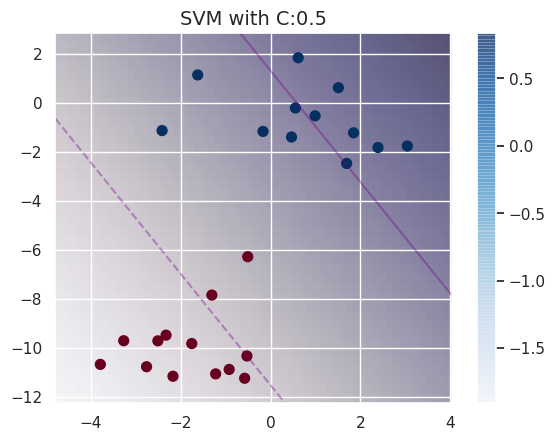

In [8]:
svm=SVM(C=.5).fit(X,y)
svm.plot_decision_boundary(X,y)

# $C=1$

Loss:72.932 ||W||=0.357, Acc:0.16
Loss:38.524 ||W||=0.261, Acc:0.08
Loss:17.152 ||W||=0.181, Acc:0.6
Loss:16.182 ||W||=0.140, Acc:0.64
Loss:15.475 ||W||=0.106, Acc:0.6
Loss:14.851 ||W||=0.076, Acc:0.6
Loss:14.29 ||W||=0.048, Acc:0.6
Loss:13.784 ||W||=0.023, Acc:0.64
Loss:13.329 ||W||=0.000, Acc:0.64
Loss:12.918 ||W||=0.020, Acc:0.64
Loss:12.548 ||W||=0.039, Acc:0.72
Loss:12.215 ||W||=0.055, Acc:0.72
Loss:11.914 ||W||=0.070, Acc:0.84
Loss:11.642 ||W||=0.084, Acc:0.84
Loss:11.397 ||W||=0.097, Acc:0.84
Loss:11.176 ||W||=0.108, Acc:0.84
Loss:10.976 ||W||=0.118, Acc:0.88
Loss:10.796 ||W||=0.127, Acc:0.92
Loss:10.633 ||W||=0.135, Acc:0.92
Loss:10.486 ||W||=0.143, Acc:0.92


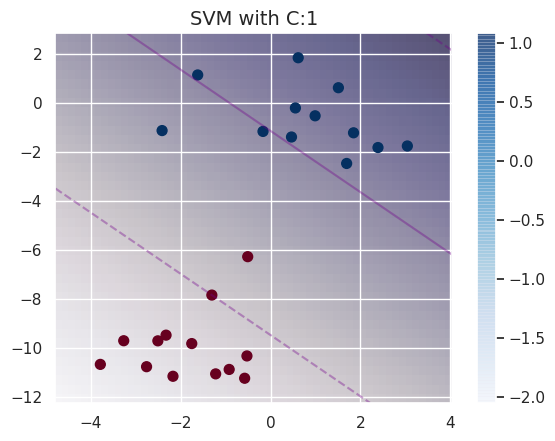

In [9]:
svm=SVM(C=1).fit(X,y)
svm.plot_decision_boundary(X,y)

# $C=5$

Loss:94.838 ||W||=0.856, Acc:0.72
Loss:82.046 ||W||=0.824, Acc:0.72
Loss:72.69 ||W||=0.780, Acc:0.76
Loss:65.902 ||W||=0.743, Acc:0.76
Loss:60.017 ||W||=0.710, Acc:0.8
Loss:54.727 ||W||=0.680, Acc:0.84
Loss:49.969 ||W||=0.654, Acc:0.88
Loss:45.882 ||W||=0.624, Acc:0.88
Loss:42.491 ||W||=0.590, Acc:0.88
Loss:39.437 ||W||=0.559, Acc:0.88
Loss:37.079 ||W||=0.527, Acc:0.88
Loss:35.05 ||W||=0.496, Acc:0.92
Loss:33.223 ||W||=0.469, Acc:0.92
Loss:31.575 ||W||=0.444, Acc:0.92
Loss:30.09 ||W||=0.422, Acc:0.92
Loss:28.75 ||W||=0.401, Acc:0.92
Loss:27.505 ||W||=0.384, Acc:0.92
Loss:26.346 ||W||=0.371, Acc:0.96
Loss:25.296 ||W||=0.358, Acc:0.96
Loss:24.346 ||W||=0.347, Acc:0.96


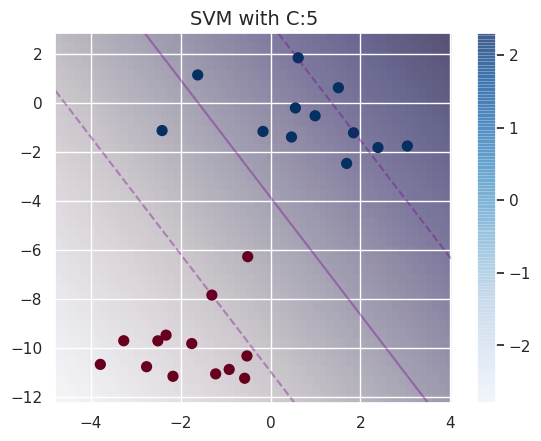

In [10]:
svm=SVM(C=5).fit(X,y)
svm.plot_decision_boundary(X,y)

# $C=10$

Loss:292.26 ||W||=0.047, Acc:0.64
Loss:219.02 ||W||=0.201, Acc:0.64
Loss:153.07 ||W||=0.340, Acc:0.68
Loss:96.049 ||W||=0.452, Acc:0.8
Loss:62.953 ||W||=0.480, Acc:0.88
Loss:54.464 ||W||=0.444, Acc:0.92
Loss:50.067 ||W||=0.402, Acc:0.96
Loss:46.101 ||W||=0.364, Acc:0.96
Loss:42.523 ||W||=0.330, Acc:0.96
Loss:39.336 ||W||=0.301, Acc:0.96
Loss:36.468 ||W||=0.275, Acc:0.96
Loss:33.88 ||W||=0.252, Acc:0.96
Loss:31.504 ||W||=0.233, Acc:1.0
Loss:29.3 ||W||=0.218, Acc:1.0
Loss:27.27 ||W||=0.208, Acc:1.0
Loss:25.436 ||W||=0.199, Acc:1.0
Loss:24.233 ||W||=0.193, Acc:1.0
Loss:23.573 ||W||=0.189, Acc:1.0
Loss:23.555 ||W||=0.189, Acc:1.0
Loss:23.542 ||W||=0.189, Acc:1.0


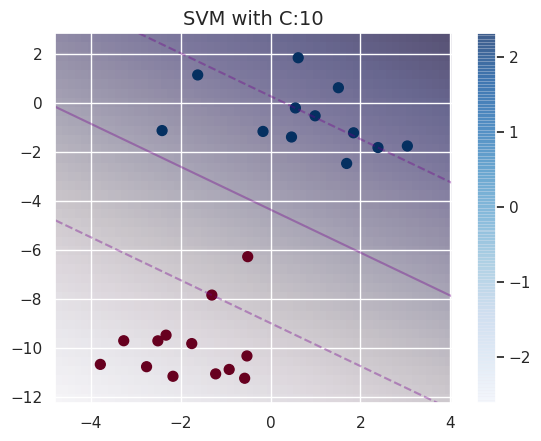

In [11]:
svm=SVM(C=10).fit(X,y)
svm.plot_decision_boundary(X,y)

# $C=100$

Loss:4197.4 ||W||=1.104, Acc:0.48
Loss:561.19 ||W||=0.710, Acc:0.92
Loss:141.74 ||W||=0.306, Acc:1.0
Loss:55.914 ||W||=0.215, Acc:1.0
Loss:35.42 ||W||=0.119, Acc:1.0
Loss:21.989 ||W||=0.093, Acc:1.0
Loss:14.343 ||W||=0.115, Acc:1.0
Loss:7.1329 ||W||=0.135, Acc:1.0
Loss:3.8513 ||W||=0.144, Acc:1.0
Loss:4.0858 ||W||=0.144, Acc:1.0
Loss:4.4176 ||W||=0.143, Acc:1.0
Loss:4.6459 ||W||=0.144, Acc:1.0
Loss:4.4637 ||W||=0.144, Acc:1.0
Loss:3.8708 ||W||=0.144, Acc:1.0
Loss:4.1042 ||W||=0.144, Acc:1.0
Loss:3.9752 ||W||=0.145, Acc:1.0
Loss:4.3488 ||W||=0.144, Acc:1.0
Loss:4.1835 ||W||=0.144, Acc:1.0
Loss:4.0168 ||W||=0.145, Acc:1.0
Loss:3.8639 ||W||=0.144, Acc:1.0


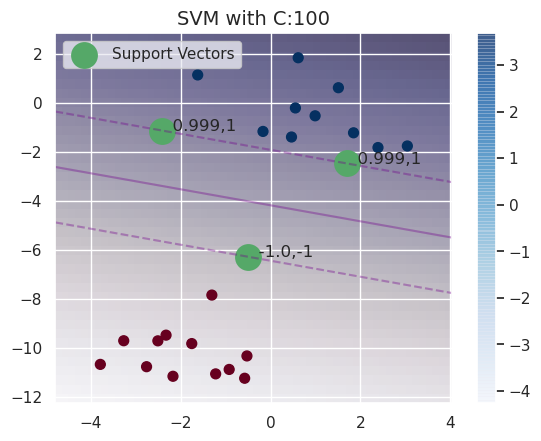

In [12]:
svm=SVM(C=100).fit(X,y)
svm.plot_decision_boundary(X,y,plot_support_vector=True)

[(-22.449757369384596, 6.095997544753922),
 (-22.449757369384596, 6.095997544753922)]

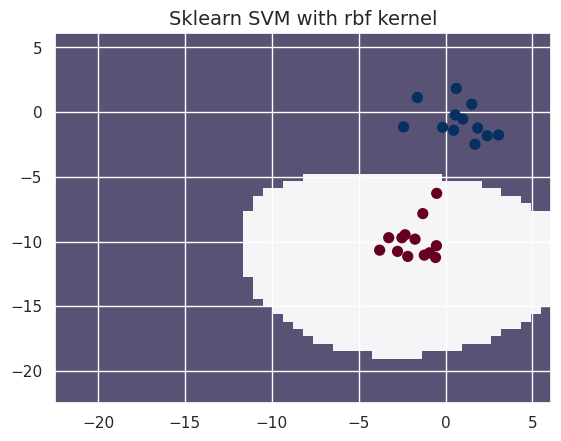

In [13]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Sklearn SVM with rbf kernel', size=14)

# Visualization works perfectly
xlim,ylim = (X.min()*2, X.max()*2), (X.min()*2, X.max()*2)
xg = np.linspace(xlim[0], xlim[1], 50)
yg = np.linspace(ylim[0], ylim[1], 50)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    Pm= clf.predict(Xgrid)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
    #ax.contour(xx, yy, P.reshape(xx.shape),levels=[.2,1],colors=color, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim)

# SVM on nonlinearly separable data

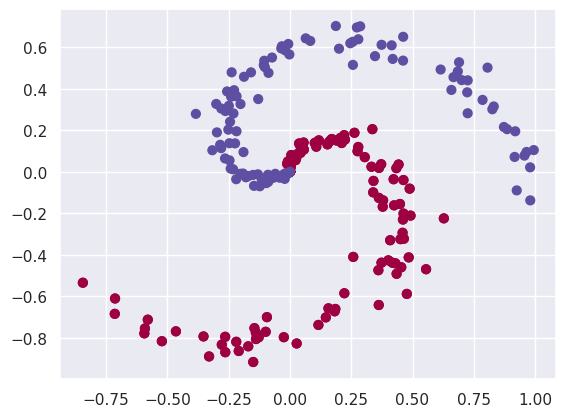

In [14]:
def spiral_data_gen():

    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 2 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
        # lets visualize the data:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return X,y

X,y=spiral_data_gen()

In [15]:
X.shape,y.shape

((200, 2), (200,))

Loss:3.9974 ||W||=1.571, Acc:0.115
Loss:3.3439 ||W||=1.421, Acc:0.115
Loss:2.8026 ||W||=1.286, Acc:0.115
Loss:2.3537 ||W||=1.164, Acc:0.115
Loss:1.981 ||W||=1.053, Acc:0.115
Loss:1.6712 ||W||=0.953, Acc:0.115
Loss:1.4132 ||W||=0.862, Acc:0.115
Loss:1.1982 ||W||=0.780, Acc:0.115
Loss:1.0188 ||W||=0.705, Acc:0.115
Loss:0.86865 ||W||=0.638, Acc:0.115
Loss:0.74292 ||W||=0.577, Acc:0.115
Loss:0.63742 ||W||=0.522, Acc:0.115
Loss:0.54873 ||W||=0.473, Acc:0.115
Loss:0.47401 ||W||=0.427, Acc:0.115
Loss:0.41093 ||W||=0.387, Acc:0.115
Loss:0.35757 ||W||=0.350, Acc:0.115
Loss:0.31232 ||W||=0.316, Acc:0.115
Loss:0.27386 ||W||=0.286, Acc:0.115
Loss:0.2411 ||W||=0.259, Acc:0.115
Loss:0.21312 ||W||=0.234, Acc:0.115
Acc.: 0.115


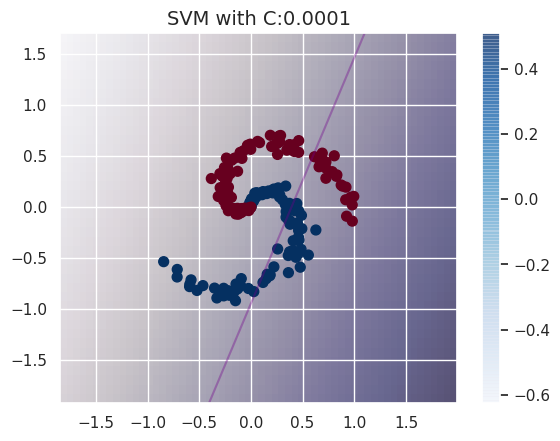

In [16]:
svm=SVM(C=.0001).fit(X,y)
print('Acc.:',(y==svm.predict(X)).mean())
svm.plot_decision_boundary(X,y)

__Not very usefully on nonlinearly separable data__